In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

#EDA and Data Cleaning

In [ ]:
df = pd.read_csv("/content/pump_sensor.csv")
sensorname = df.keys()[2:-1]

In [ ]:
df.shape

(220320, 55)

In [ ]:
df.keys()

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [ ]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [ ]:
df['machine_status'].value_counts()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

In [ ]:
def manipulate(data, detail = False):
    data=data.drop(labels=['sensor_15'],axis=1)
    data=data.drop(labels=['sensor_00'],axis=1)
    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000]
    data=data.drop(labels=['sensor_50'],axis=1)
    data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()
    if detail==True:
        print((data.isna().sum()))
        plotter((data.isna().sum()[2:-1]),'bar','fill_nan',saving=True)
    return data

def plotter(data,type,Title, saving=False):
    fig=plt.figure()
    data.plot(kind=type)
    plt.title(Title)
    if saving==True:
        plt.savefig(Title+'.png', format='png', dpi=300, transparent=True)

def plotter_m(data, encoded_y, sensorname, saving=False):
    scaler = MinMaxScaler()
    scaled_dat = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    for i in sensorname:
        fig=plt.figure()
        ax=scaled_dat[i].plot.line()
        encoded_y.plot(ax=ax)
        plt.title('together_' + str(i) )
        plt.legend(['sensor','target'])
        if saving==True:
            fig.savefig('Sensor_'+str(i)+'.png', format='png', dpi=300, transparent=True)
        plt.show()

def plotter_t(Values):
    fig=plt.Figure()
    Values.plot(subplots = True, sharex = True, figsize=(30,55))
    plt.savefig('Overview.png', format='png', dpi=300, transparent=True)
    plt.show

def plot_Y(data, col='target', saving=False, name='target'):
    import numpy as np
    y=data[col]; x=np.linspace(1,len(y),len(y))
    plt.plot(x,y)
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    if col=='target':
        plt.yticks([1,0,2], labels, rotation='vertical')
    elif col=='machine_status':
        plt.yticks([0,1,2], labels, rotation='vertical')
    if saving==True:
        plt.savefig(name+'.png', format='png', dpi=300, transparent=True)
    plt.show()


# this following functions are for turning data into time series data which can  be input to LSTMs

def preprocess(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    encoded_y=le.transform(data)
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    return pd.DataFrame(encoded_y,columns=['target'])

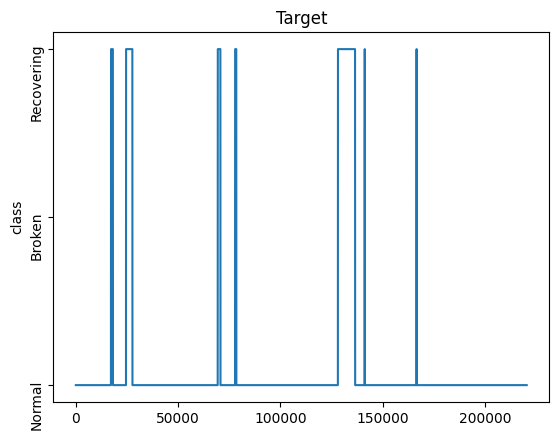

Unnamed: 0        0
timestamp         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0
machine_status    0
dtype: int64
{'BROKEN': 0, 'NORMAL': 1, 

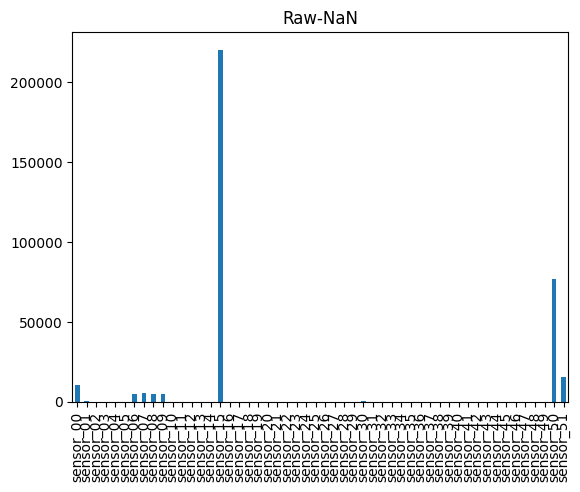

<Figure size 640x480 with 0 Axes>

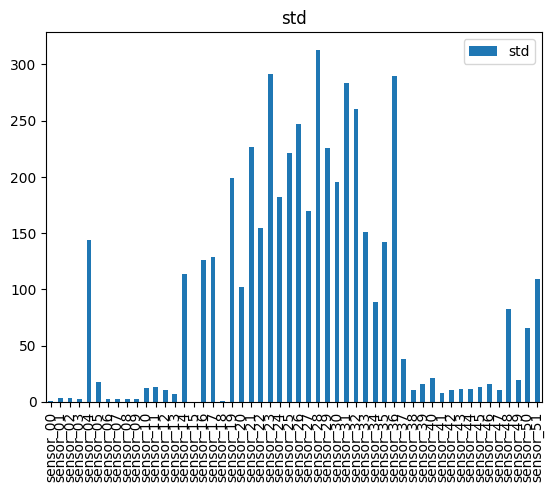

<Figure size 640x480 with 0 Axes>

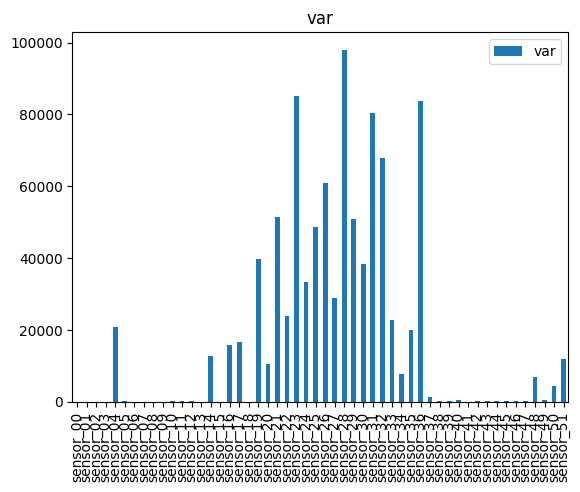

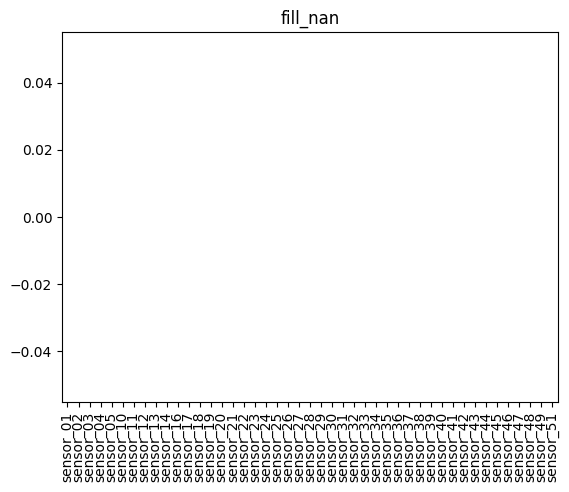

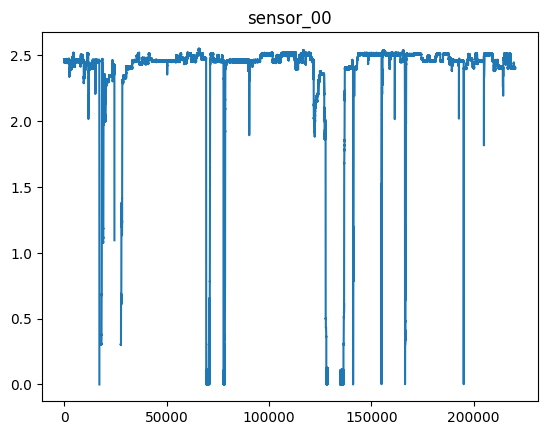

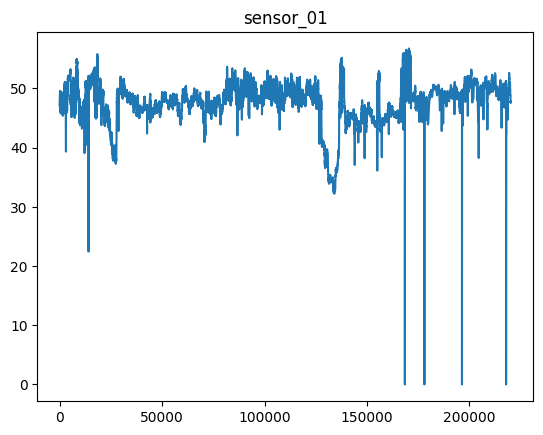

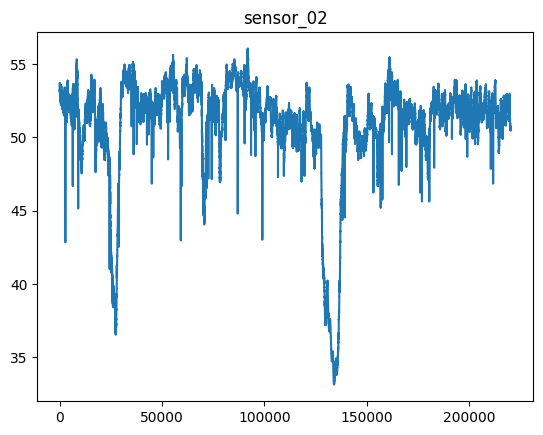

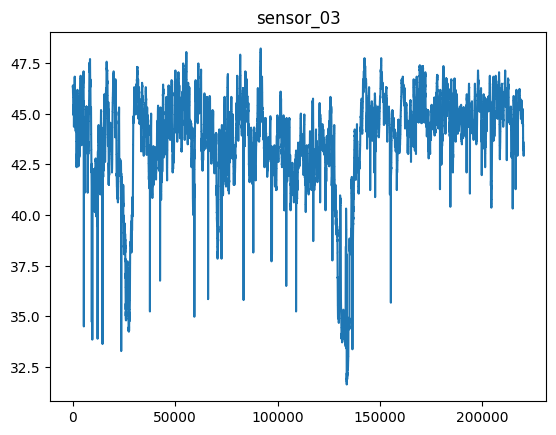

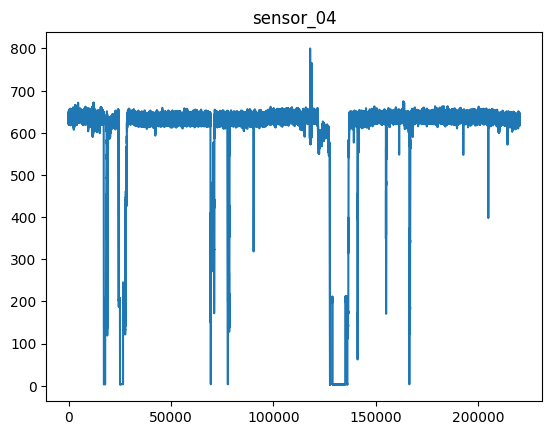

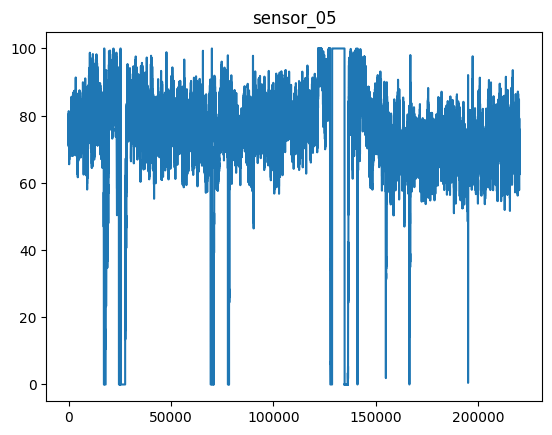

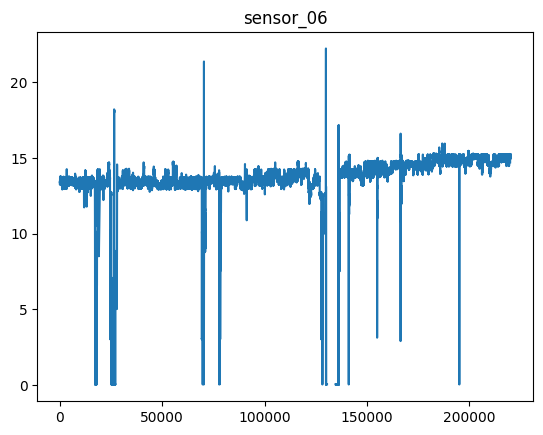

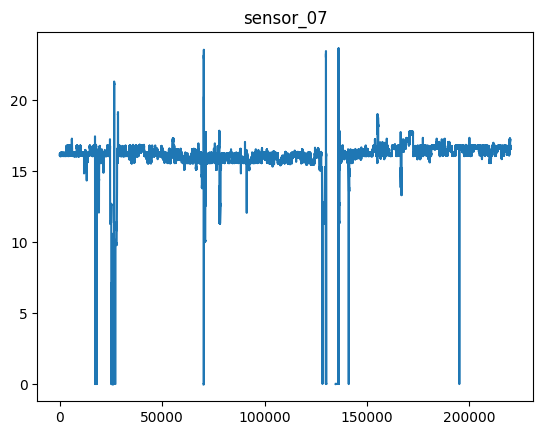

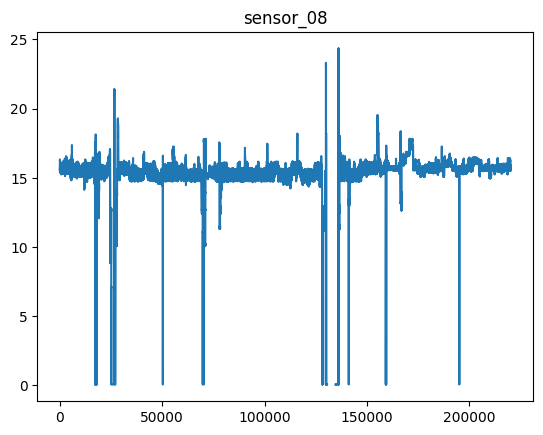

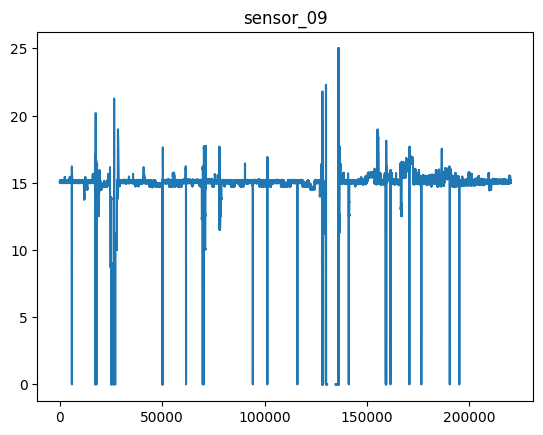

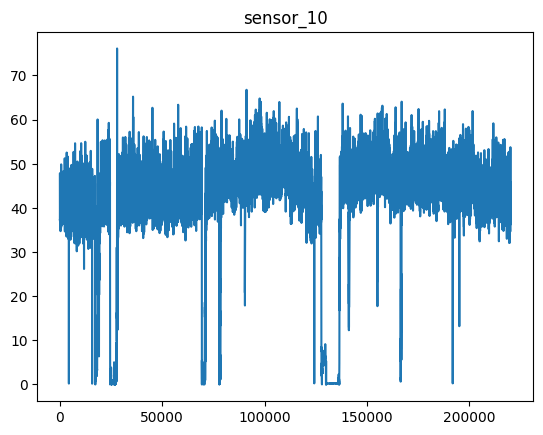

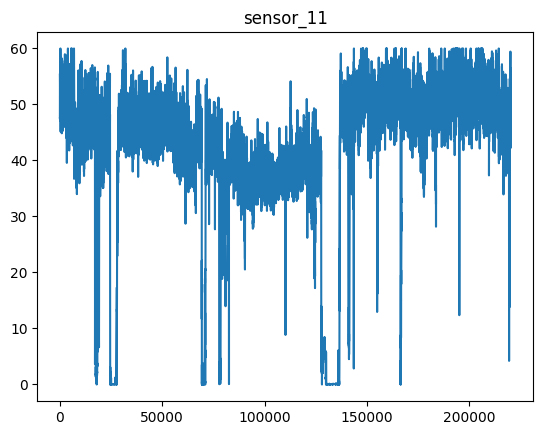

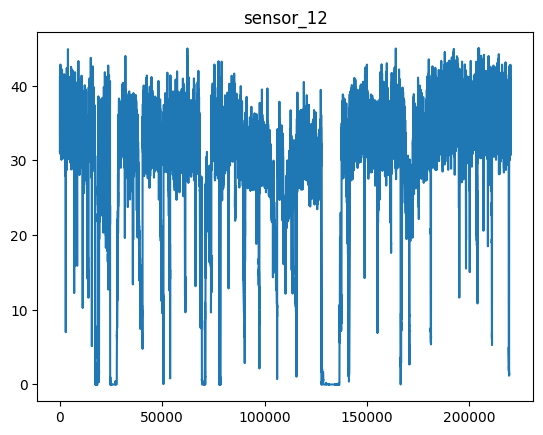

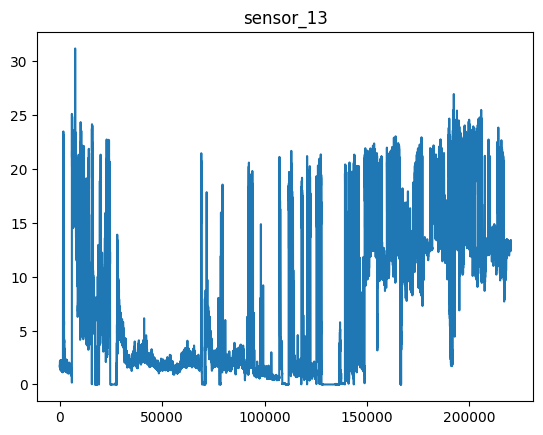

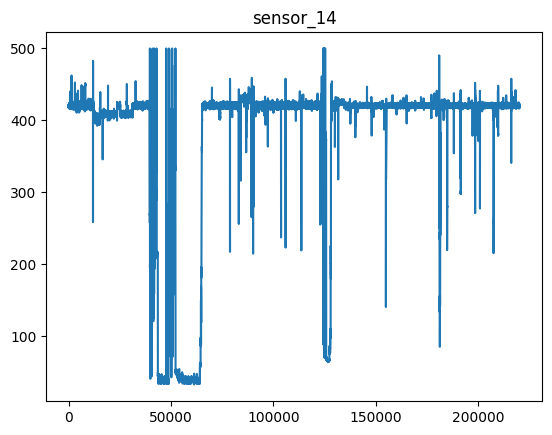

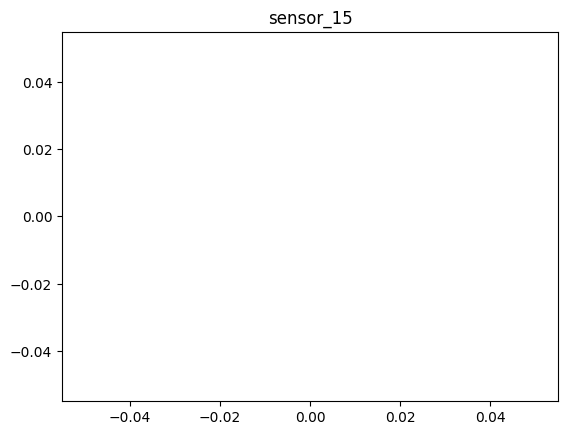

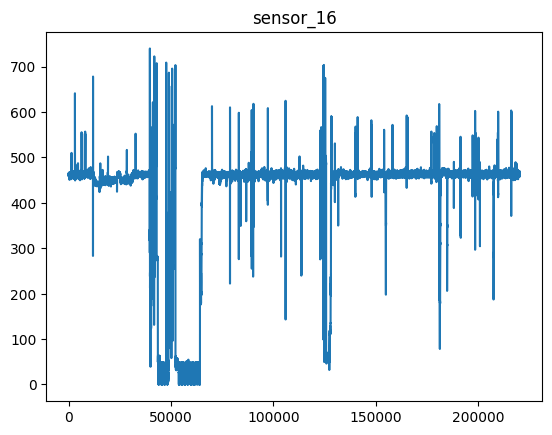

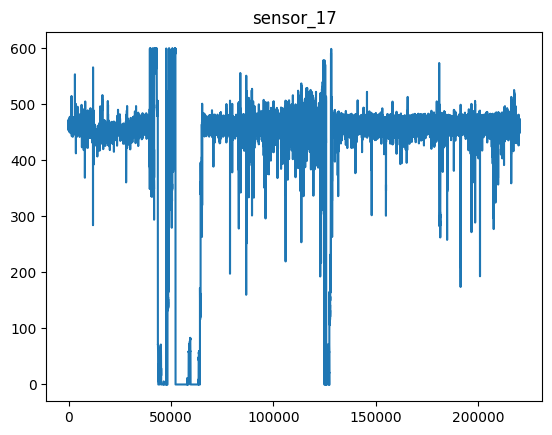

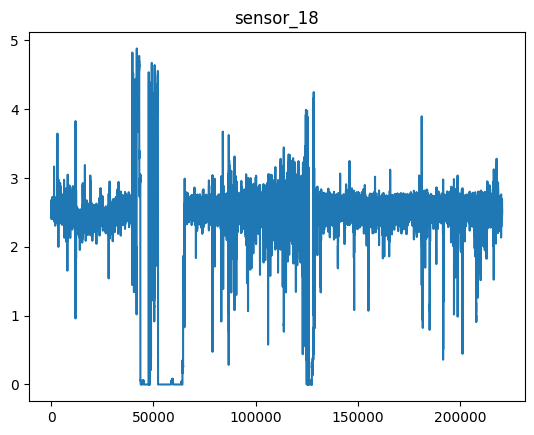

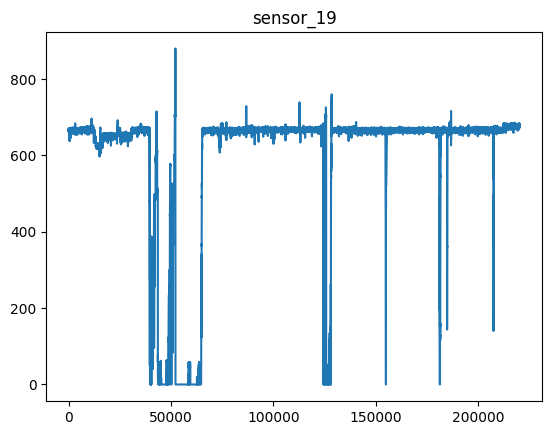

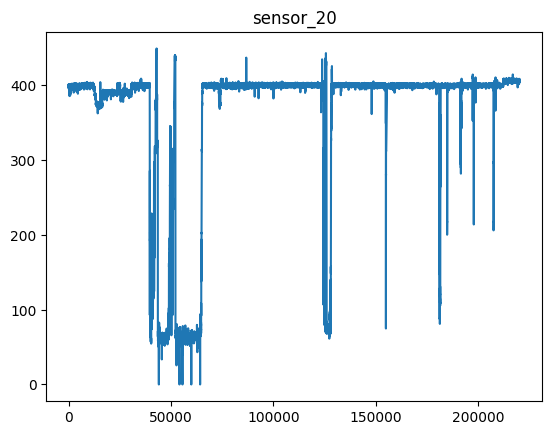

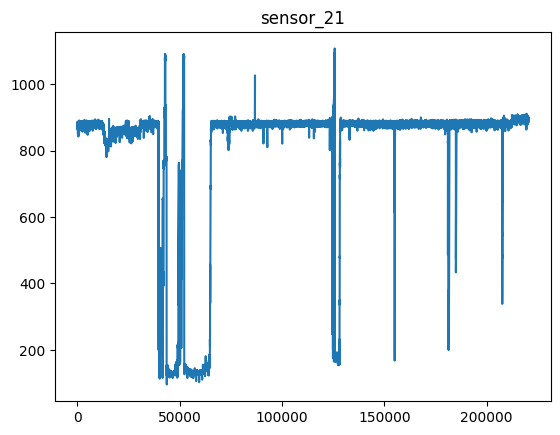

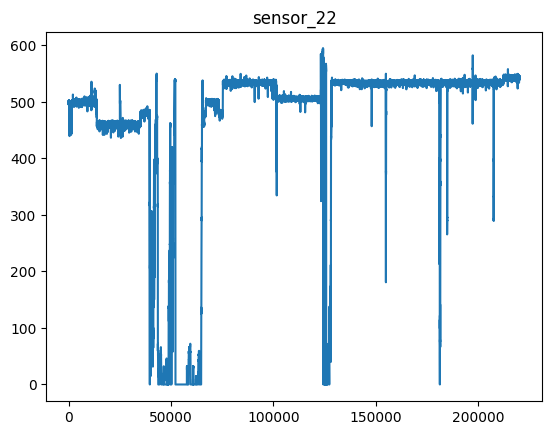

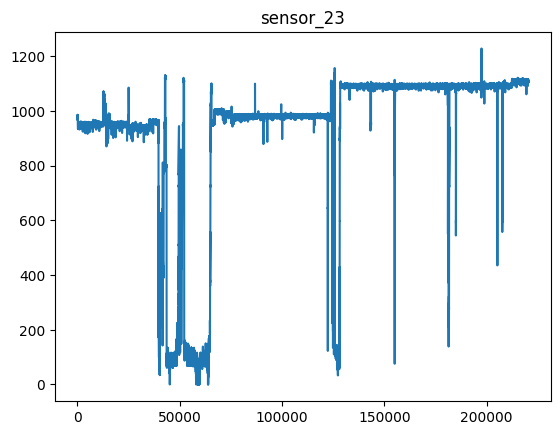

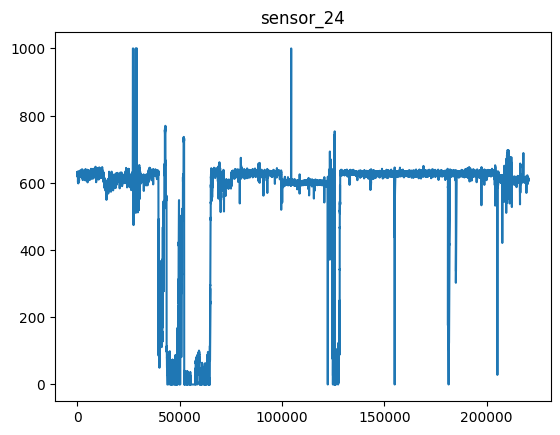

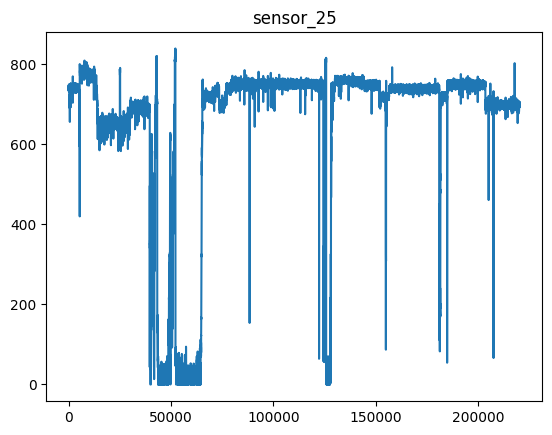

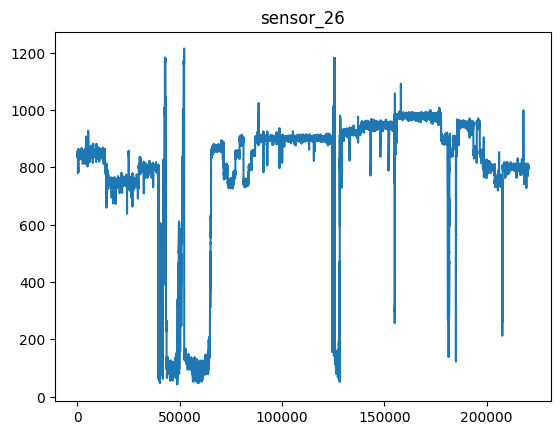

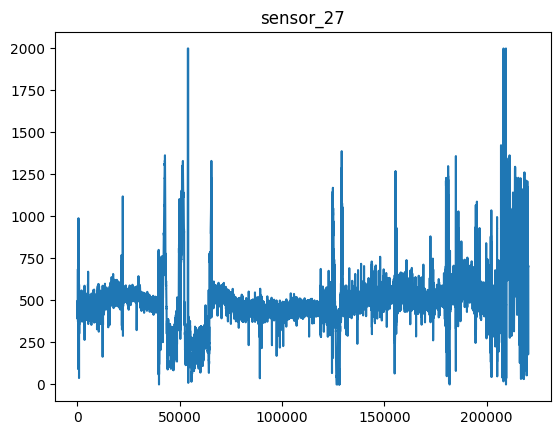

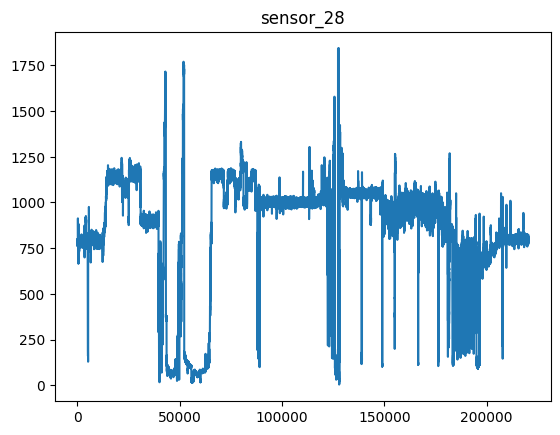

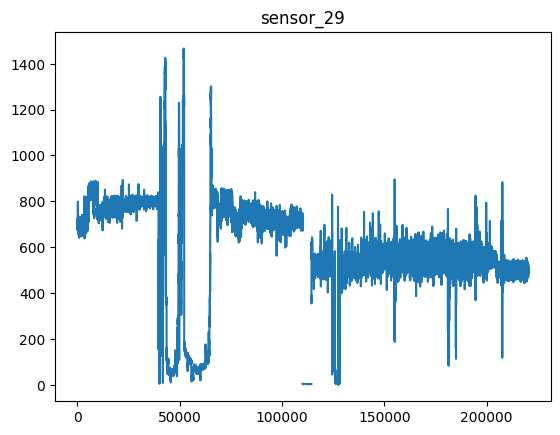

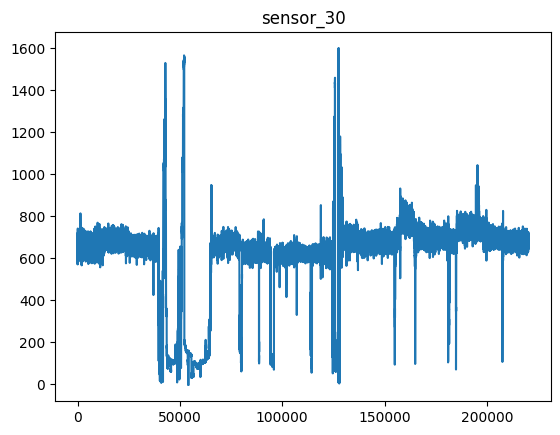

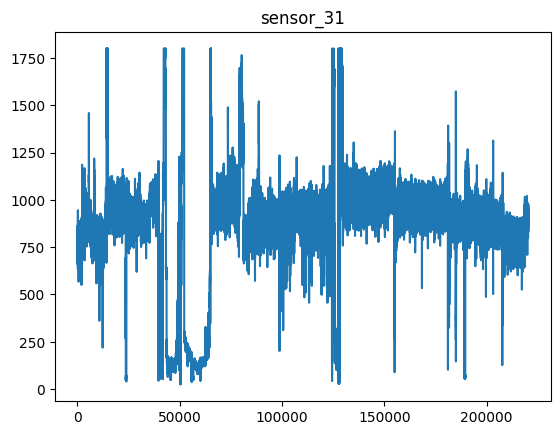

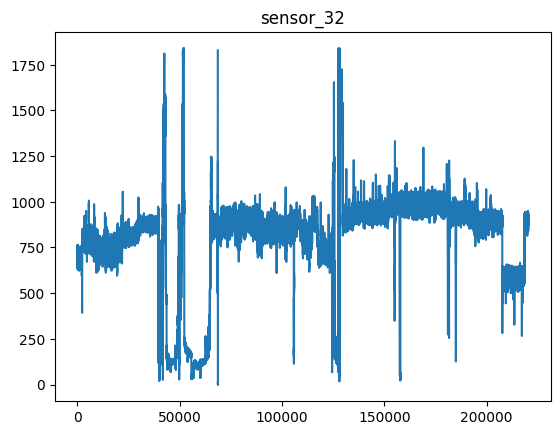

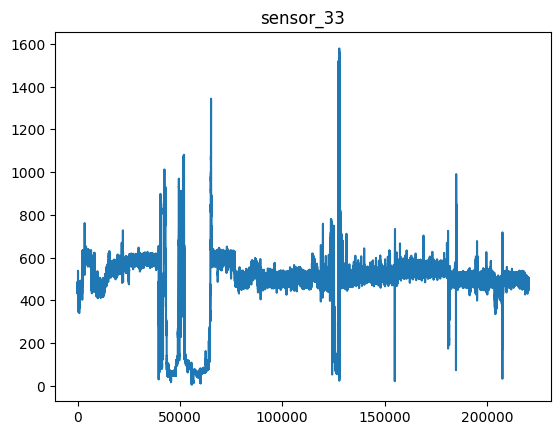

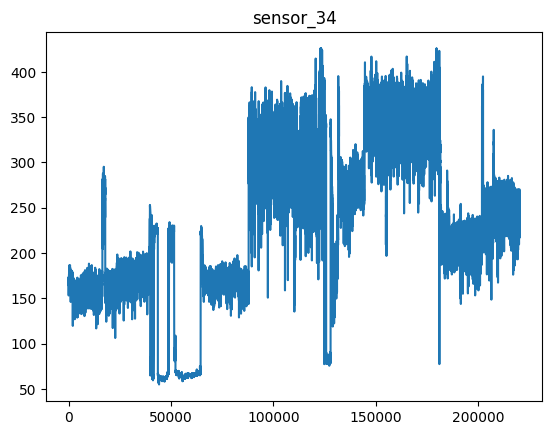

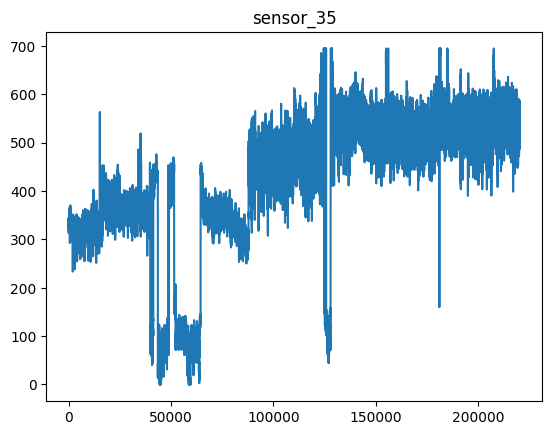

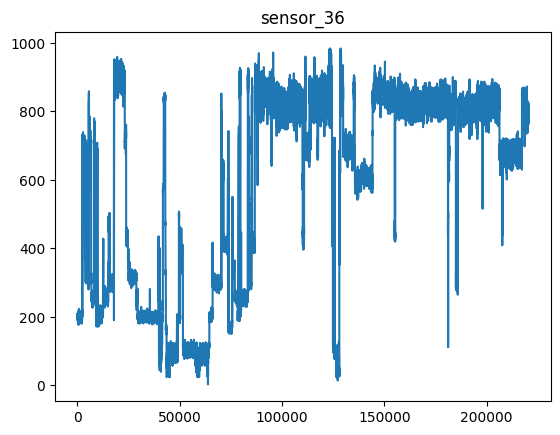

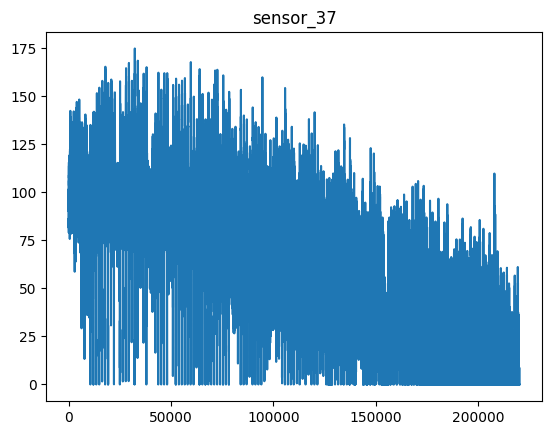

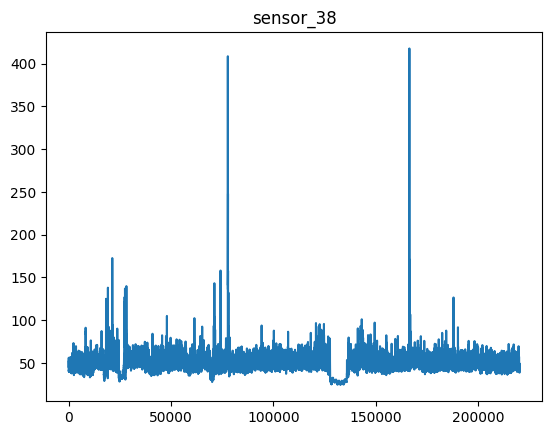

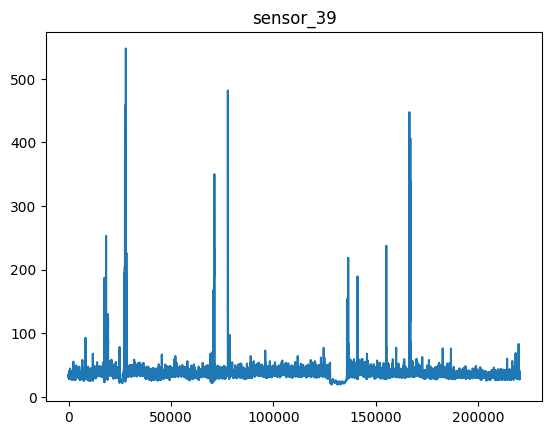

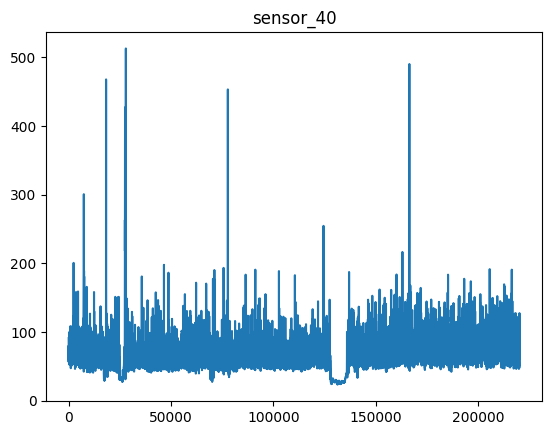

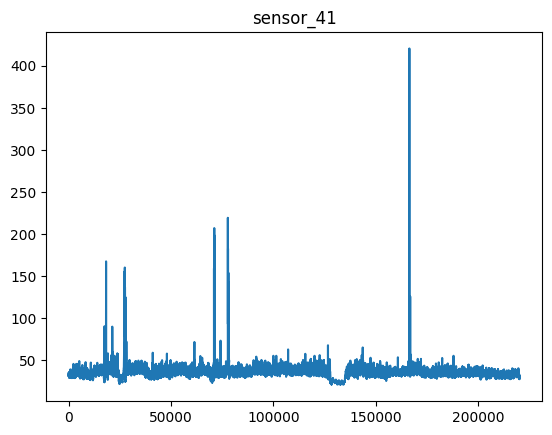

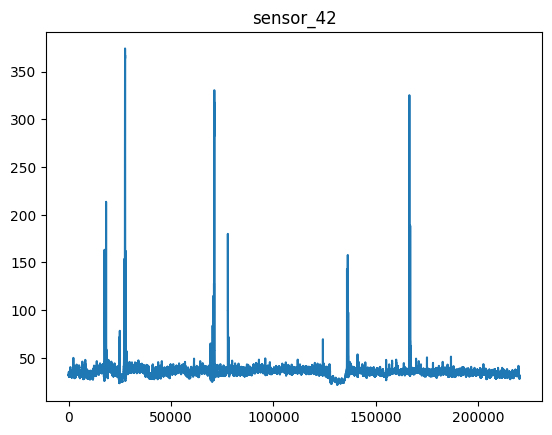

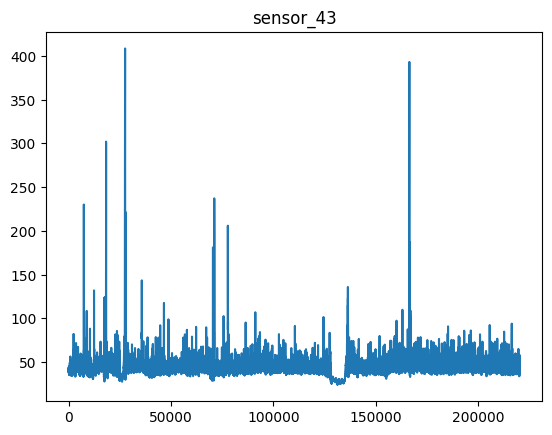

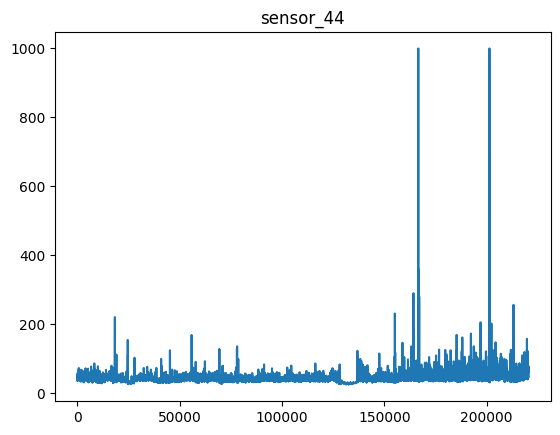

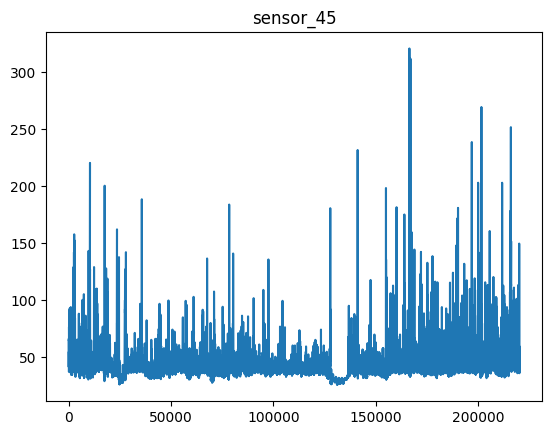

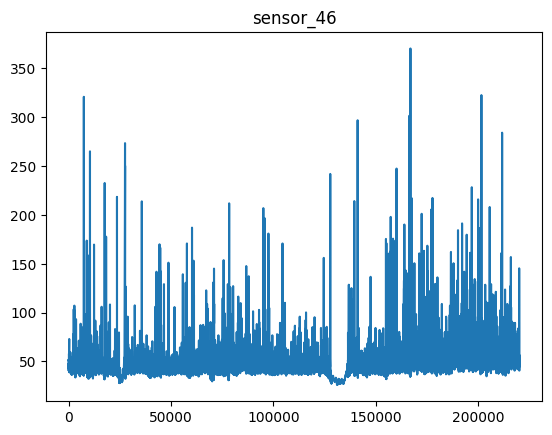

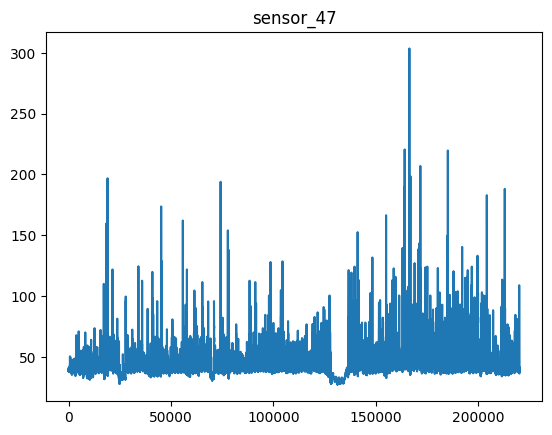

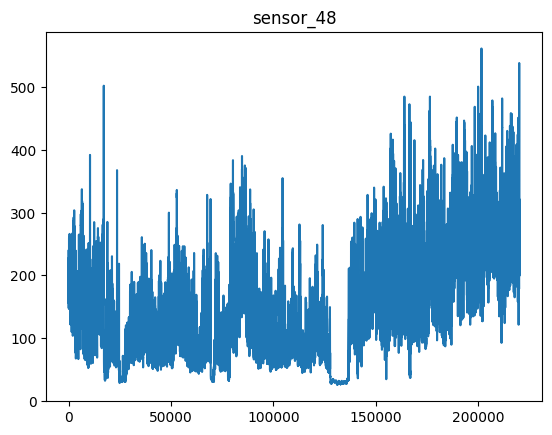

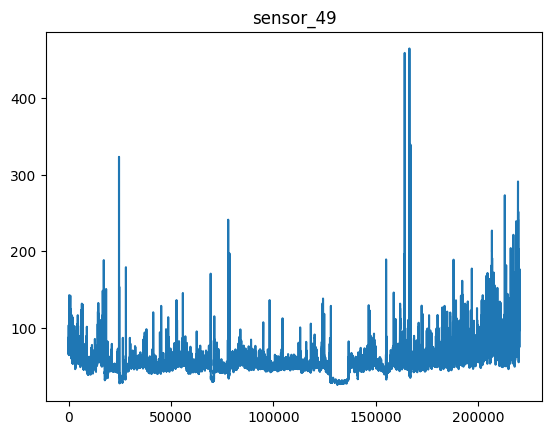

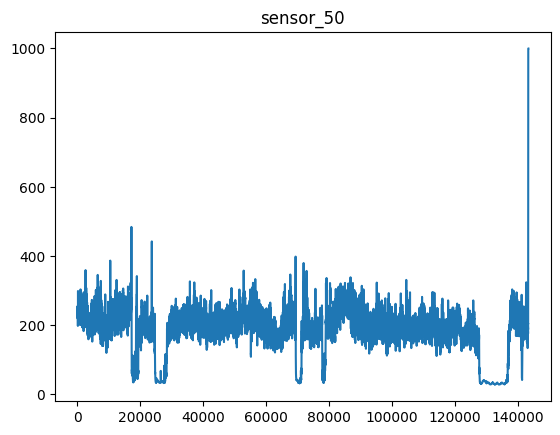

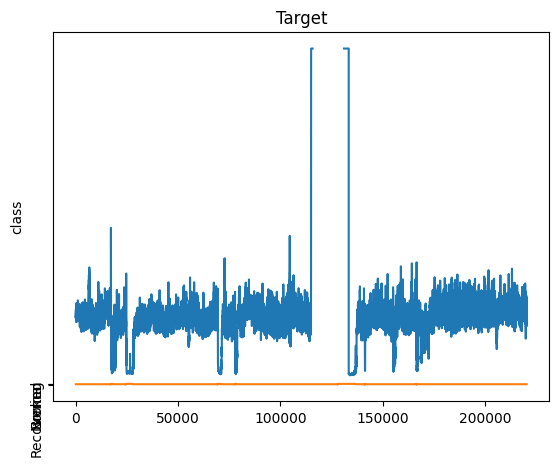

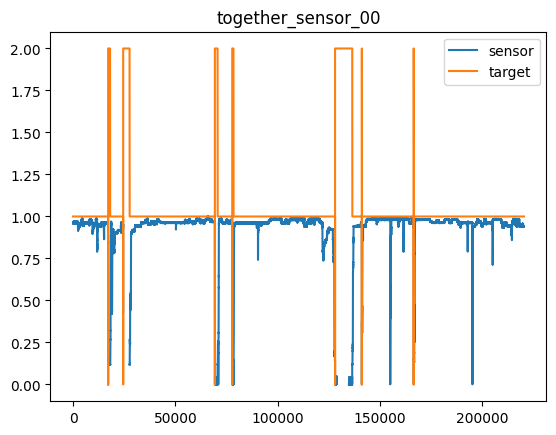

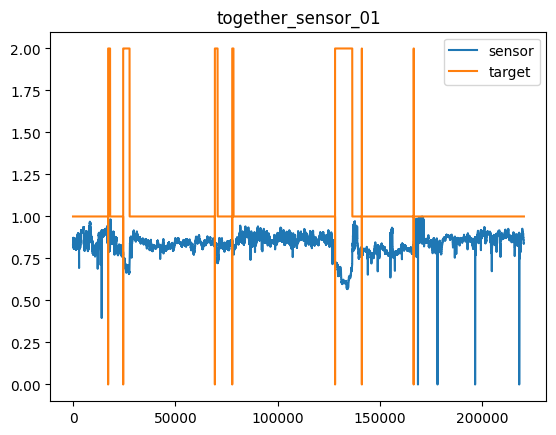

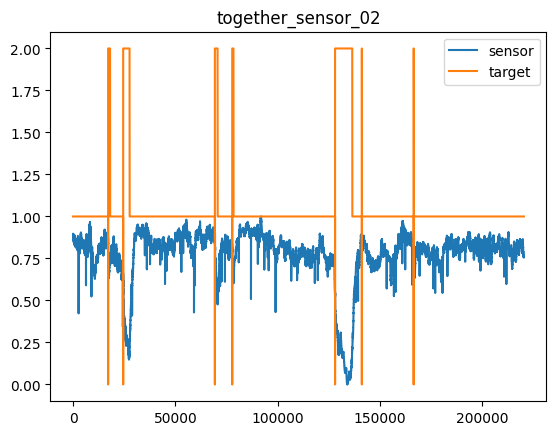

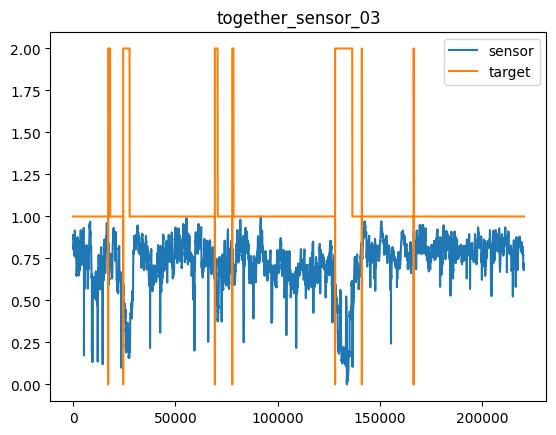

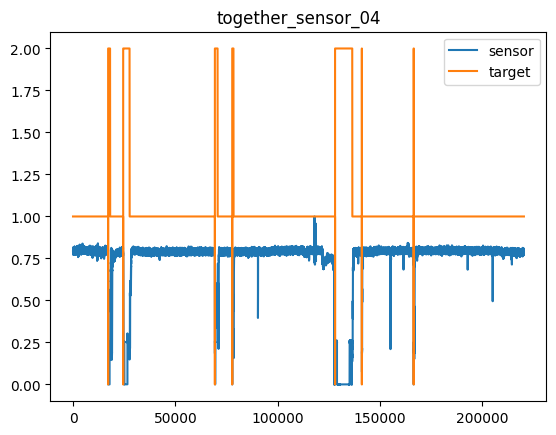

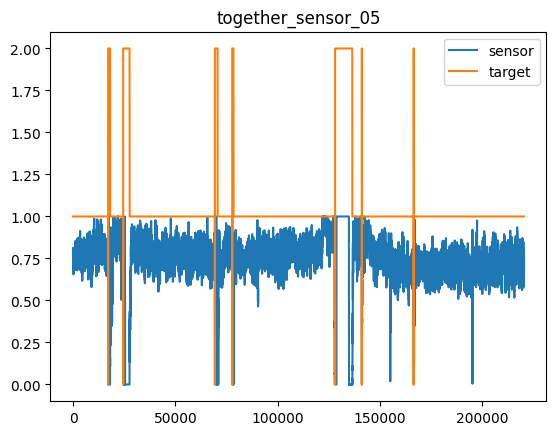

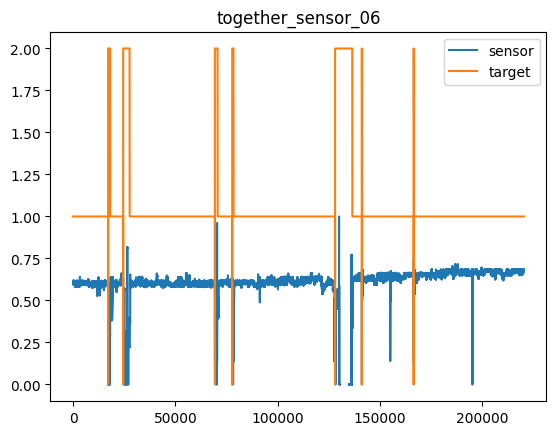

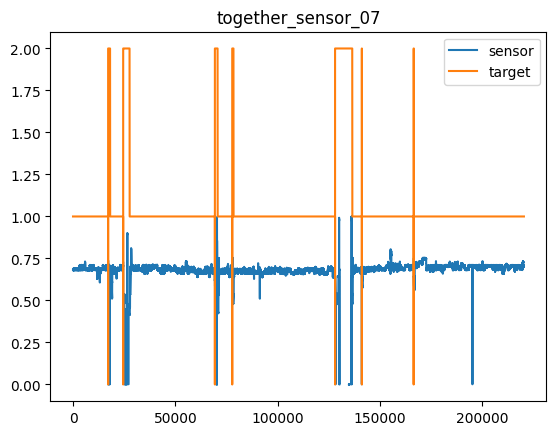

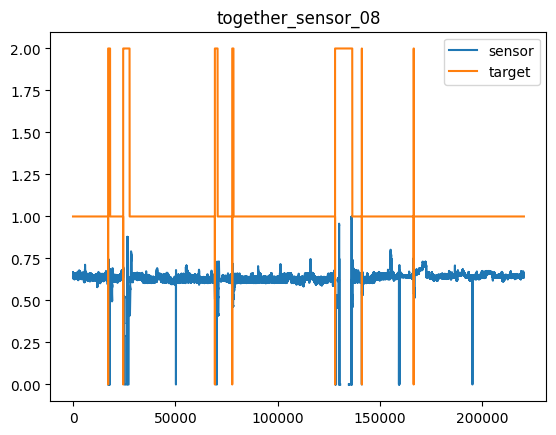

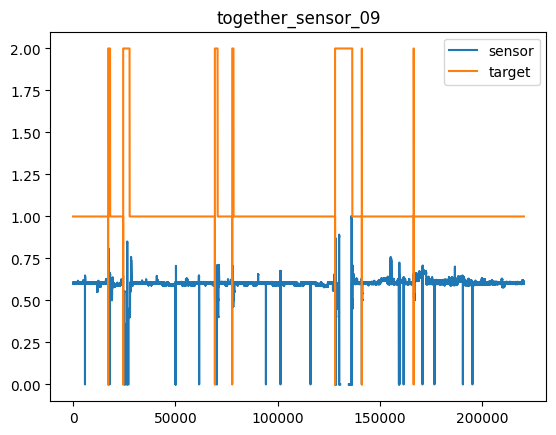

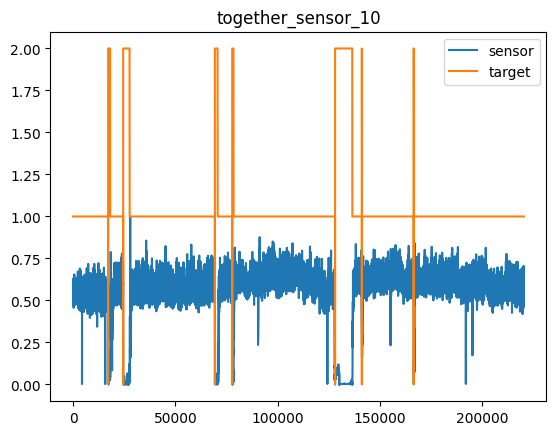

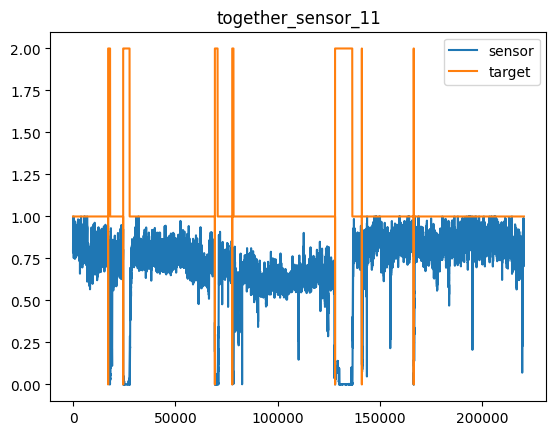

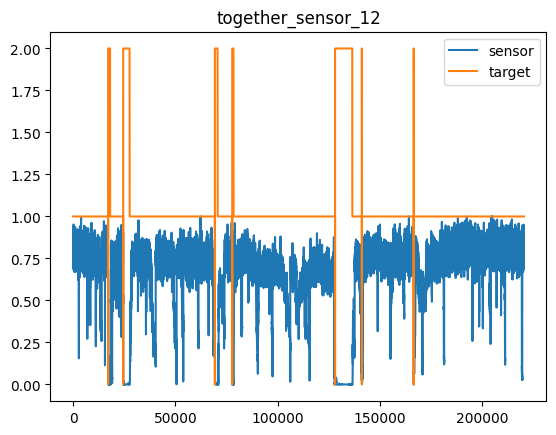

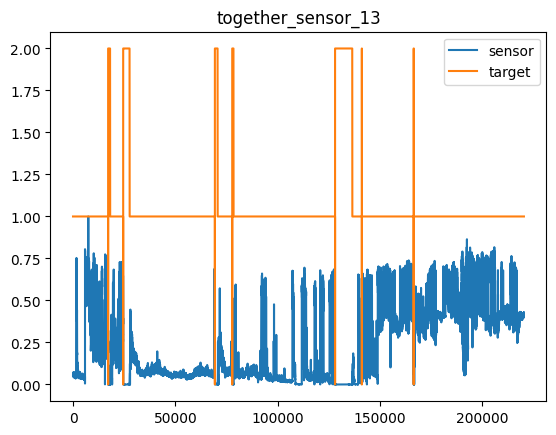

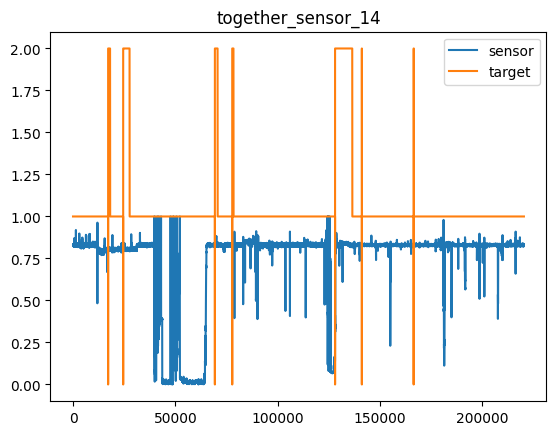

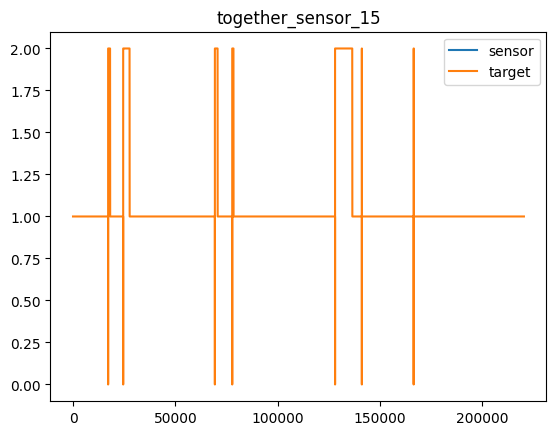

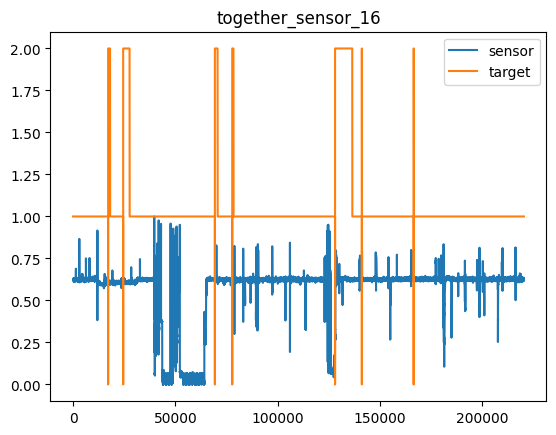

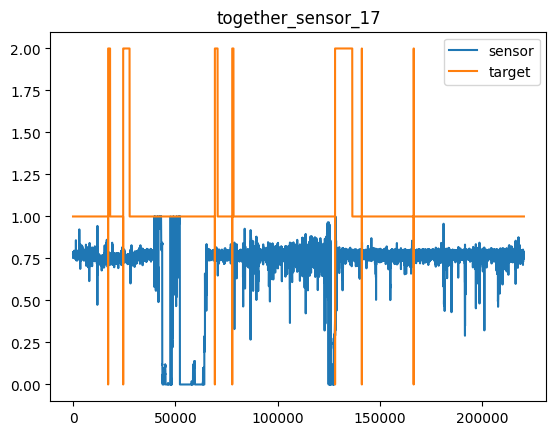

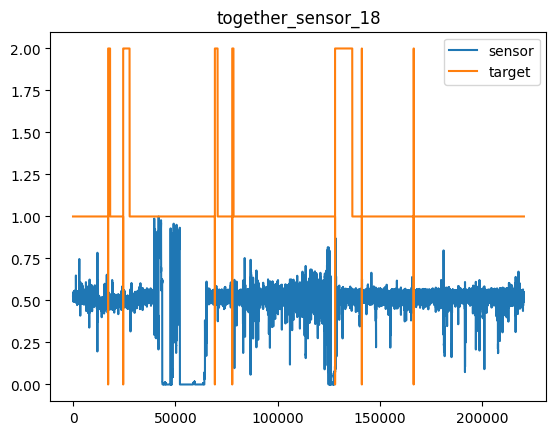

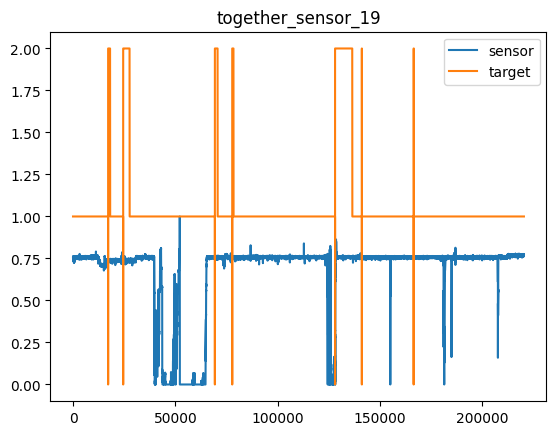

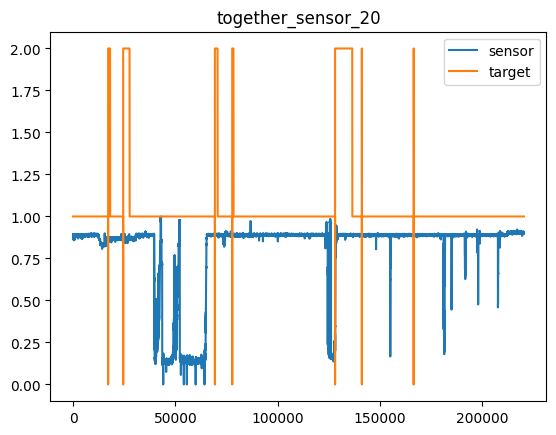

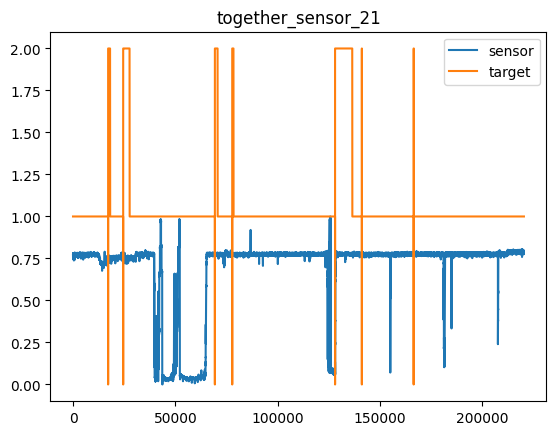

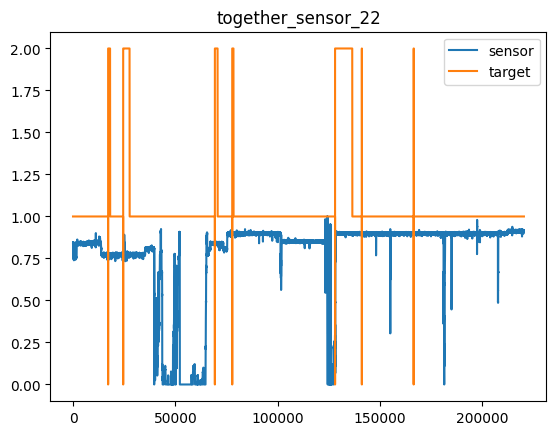

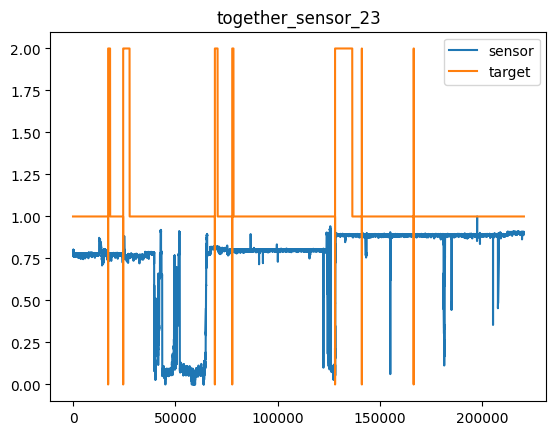

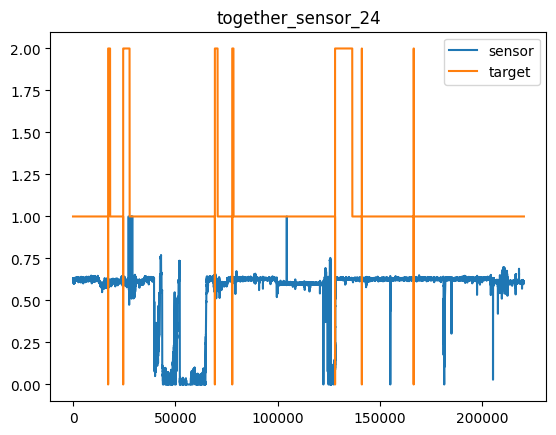

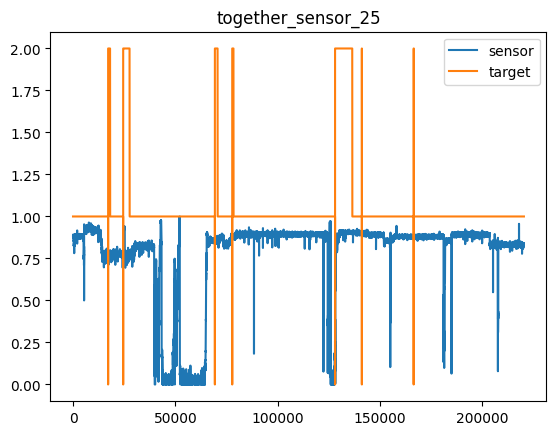

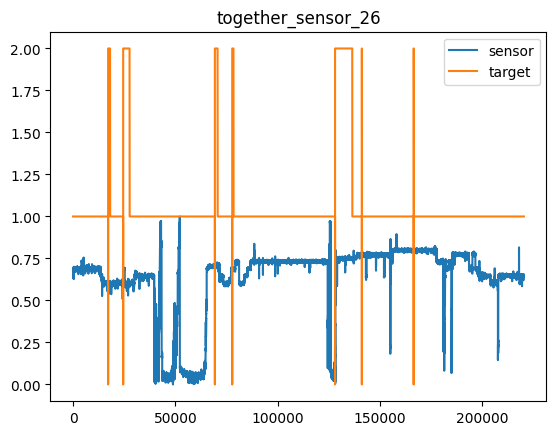

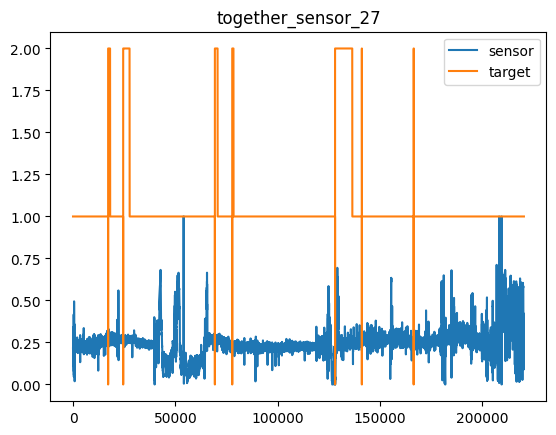

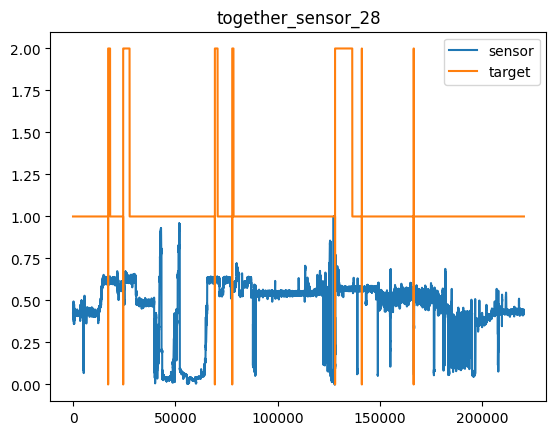

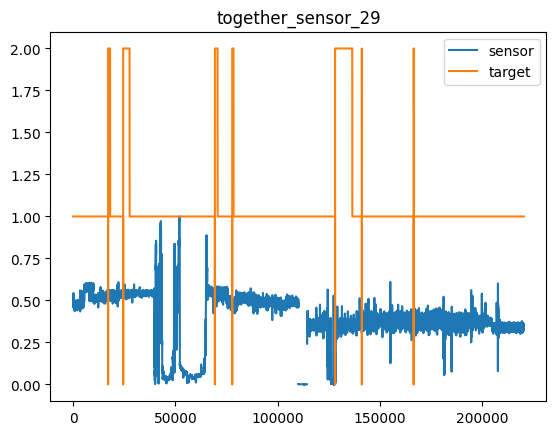

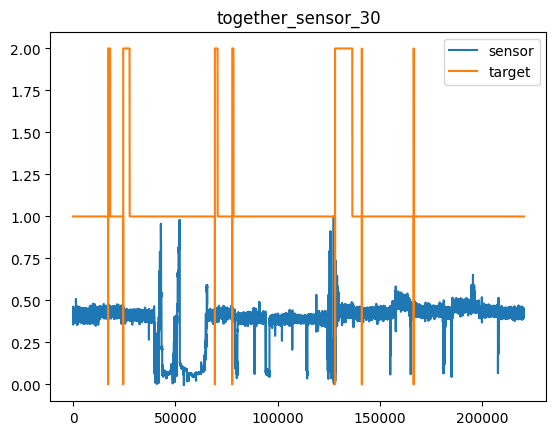

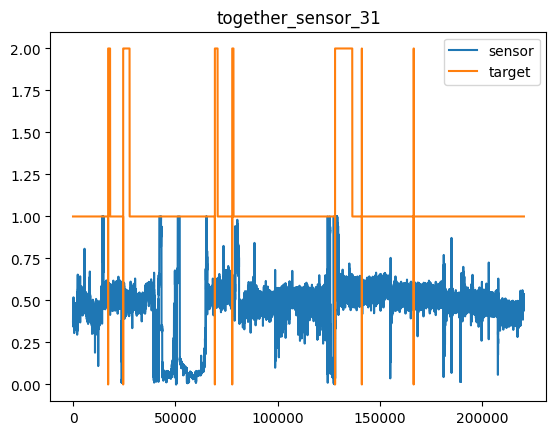

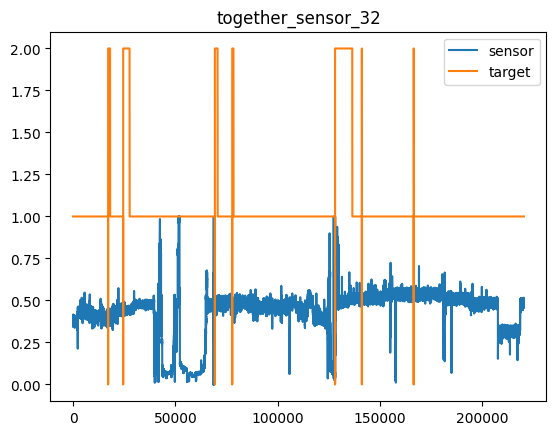

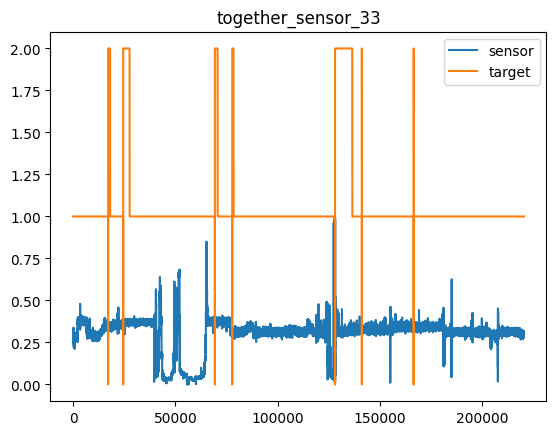

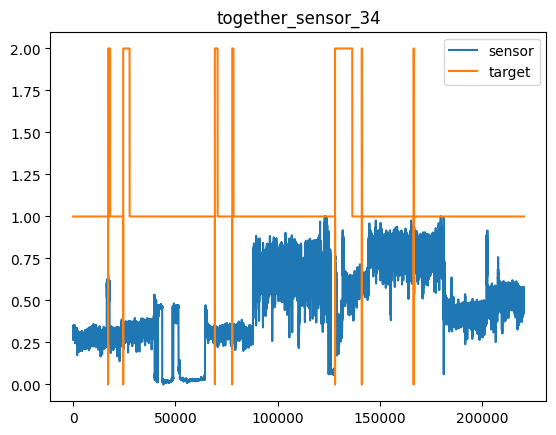

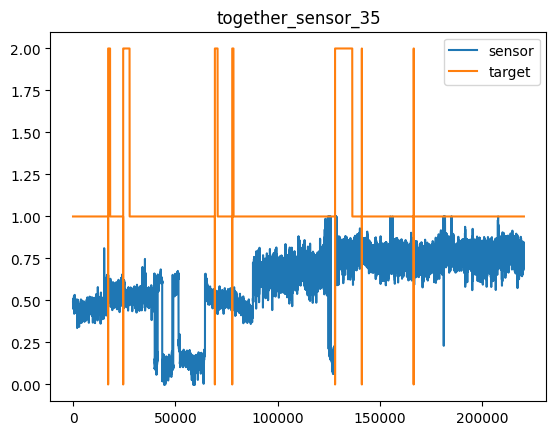

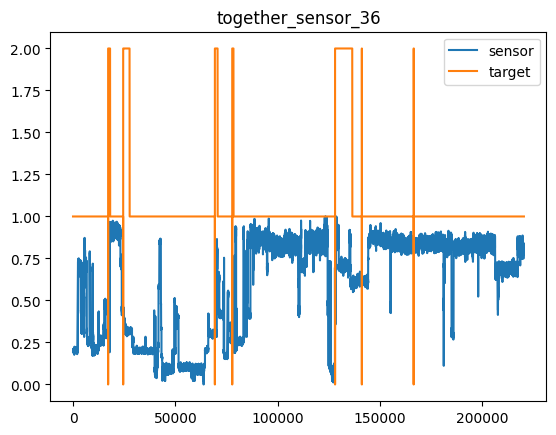

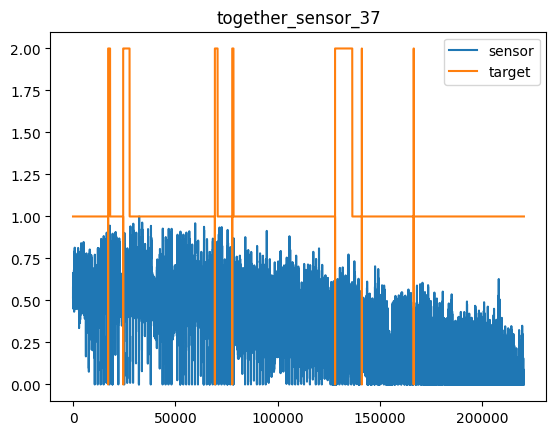

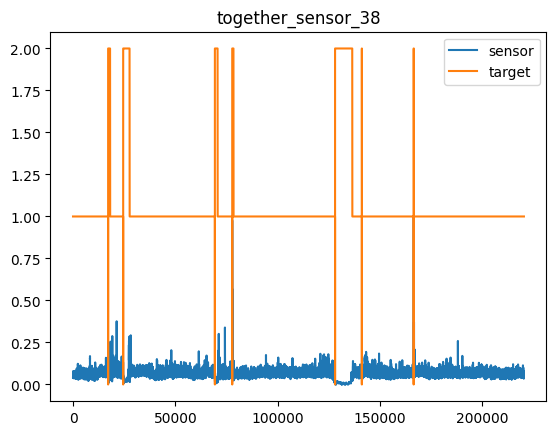

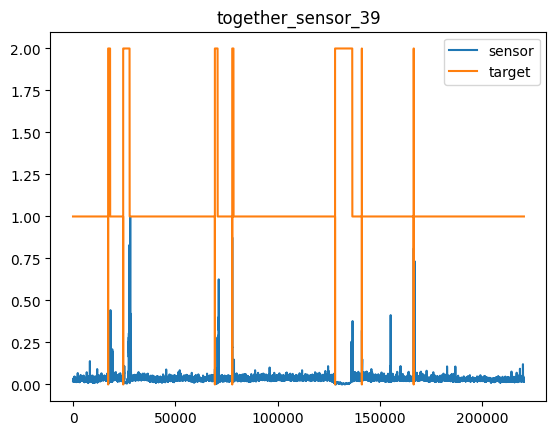

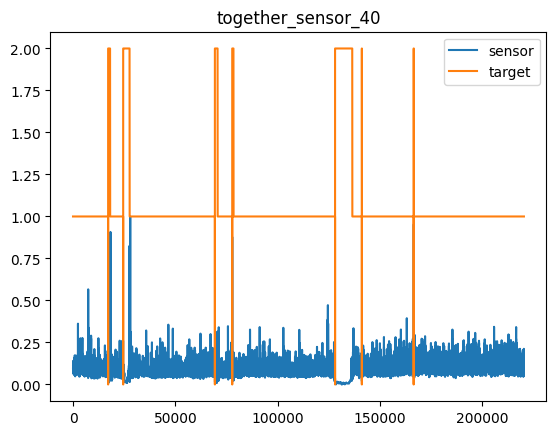

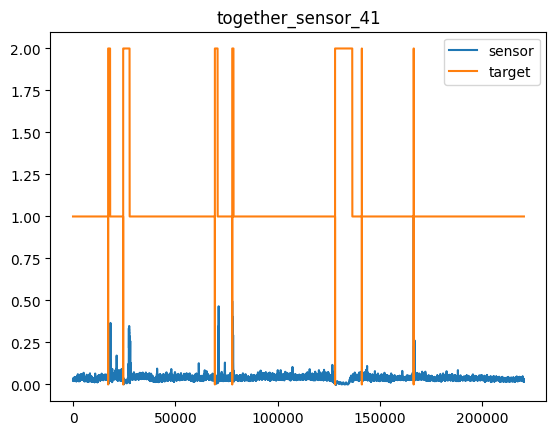

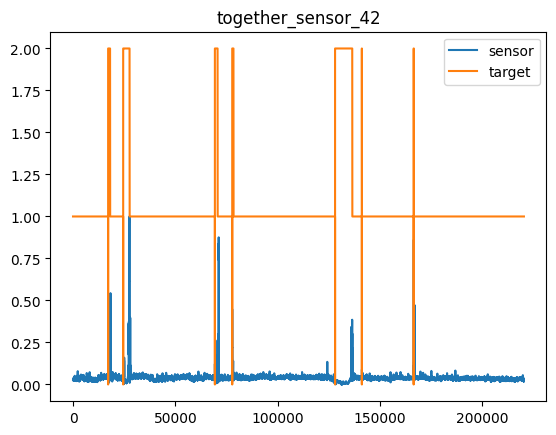

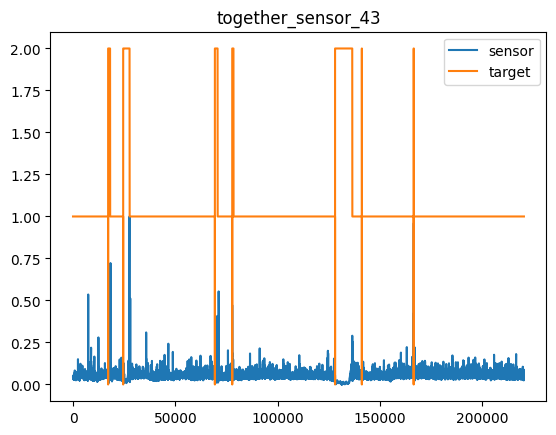

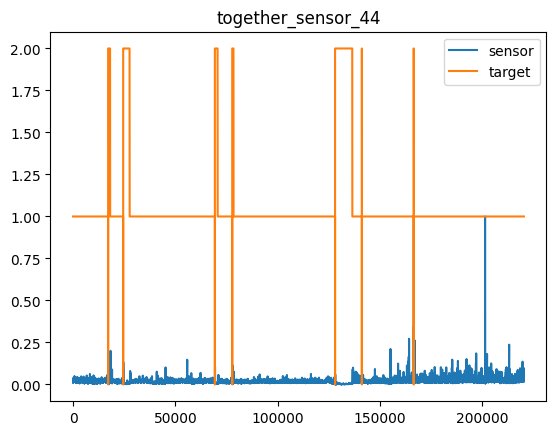

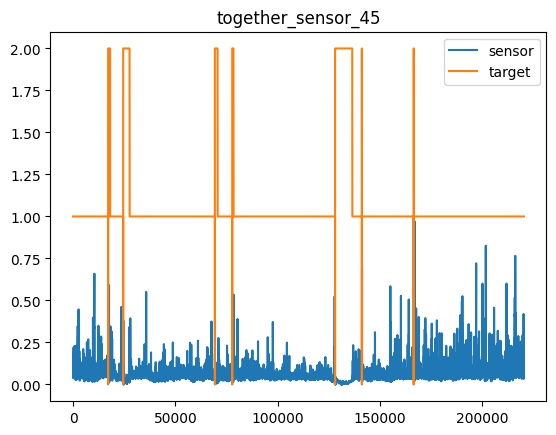

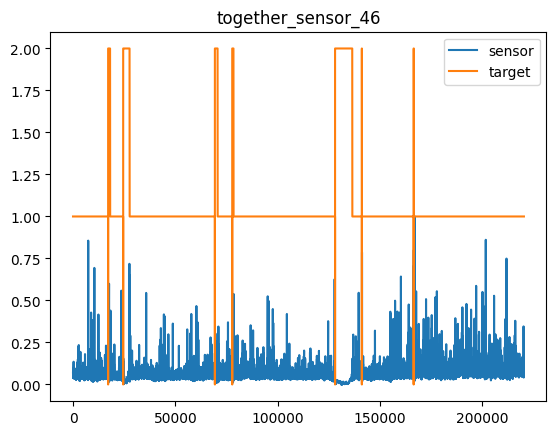

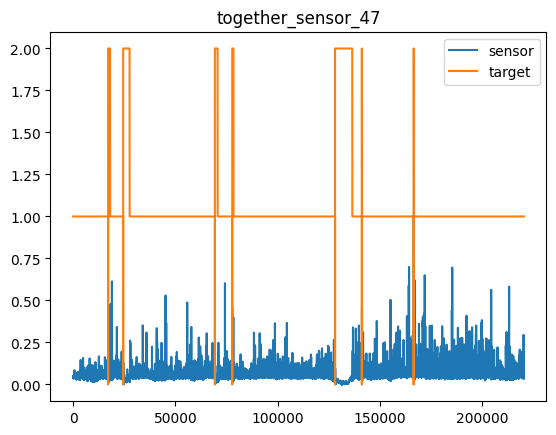

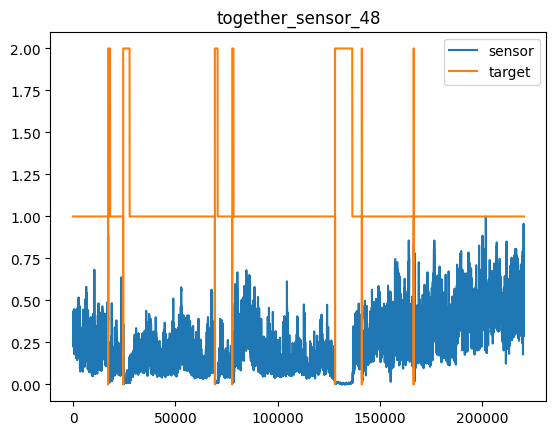

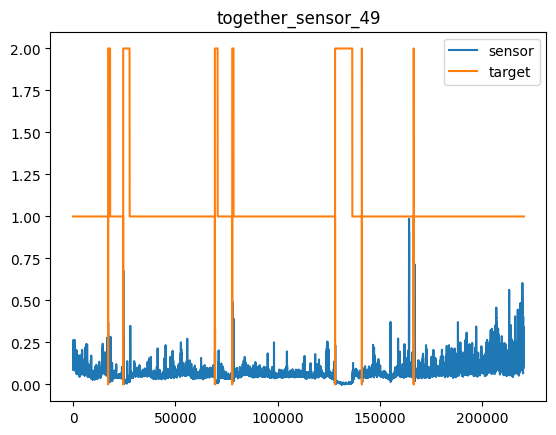

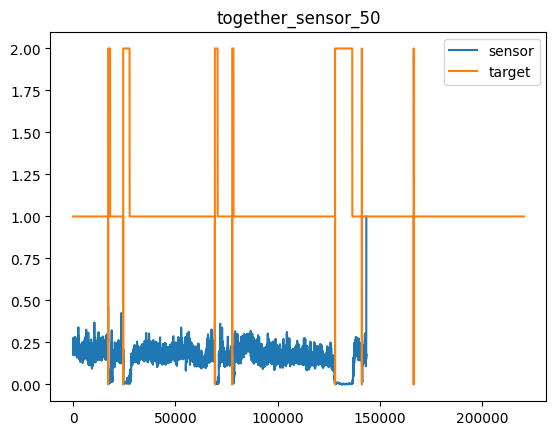

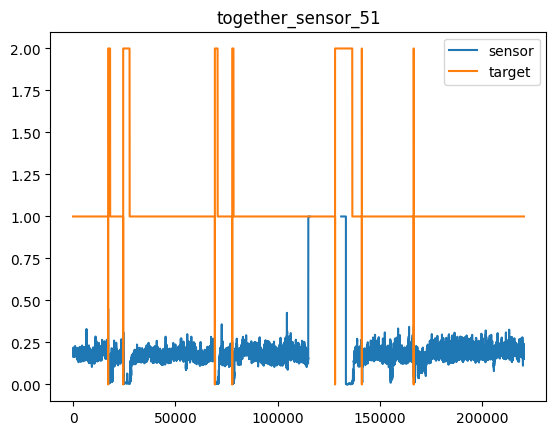

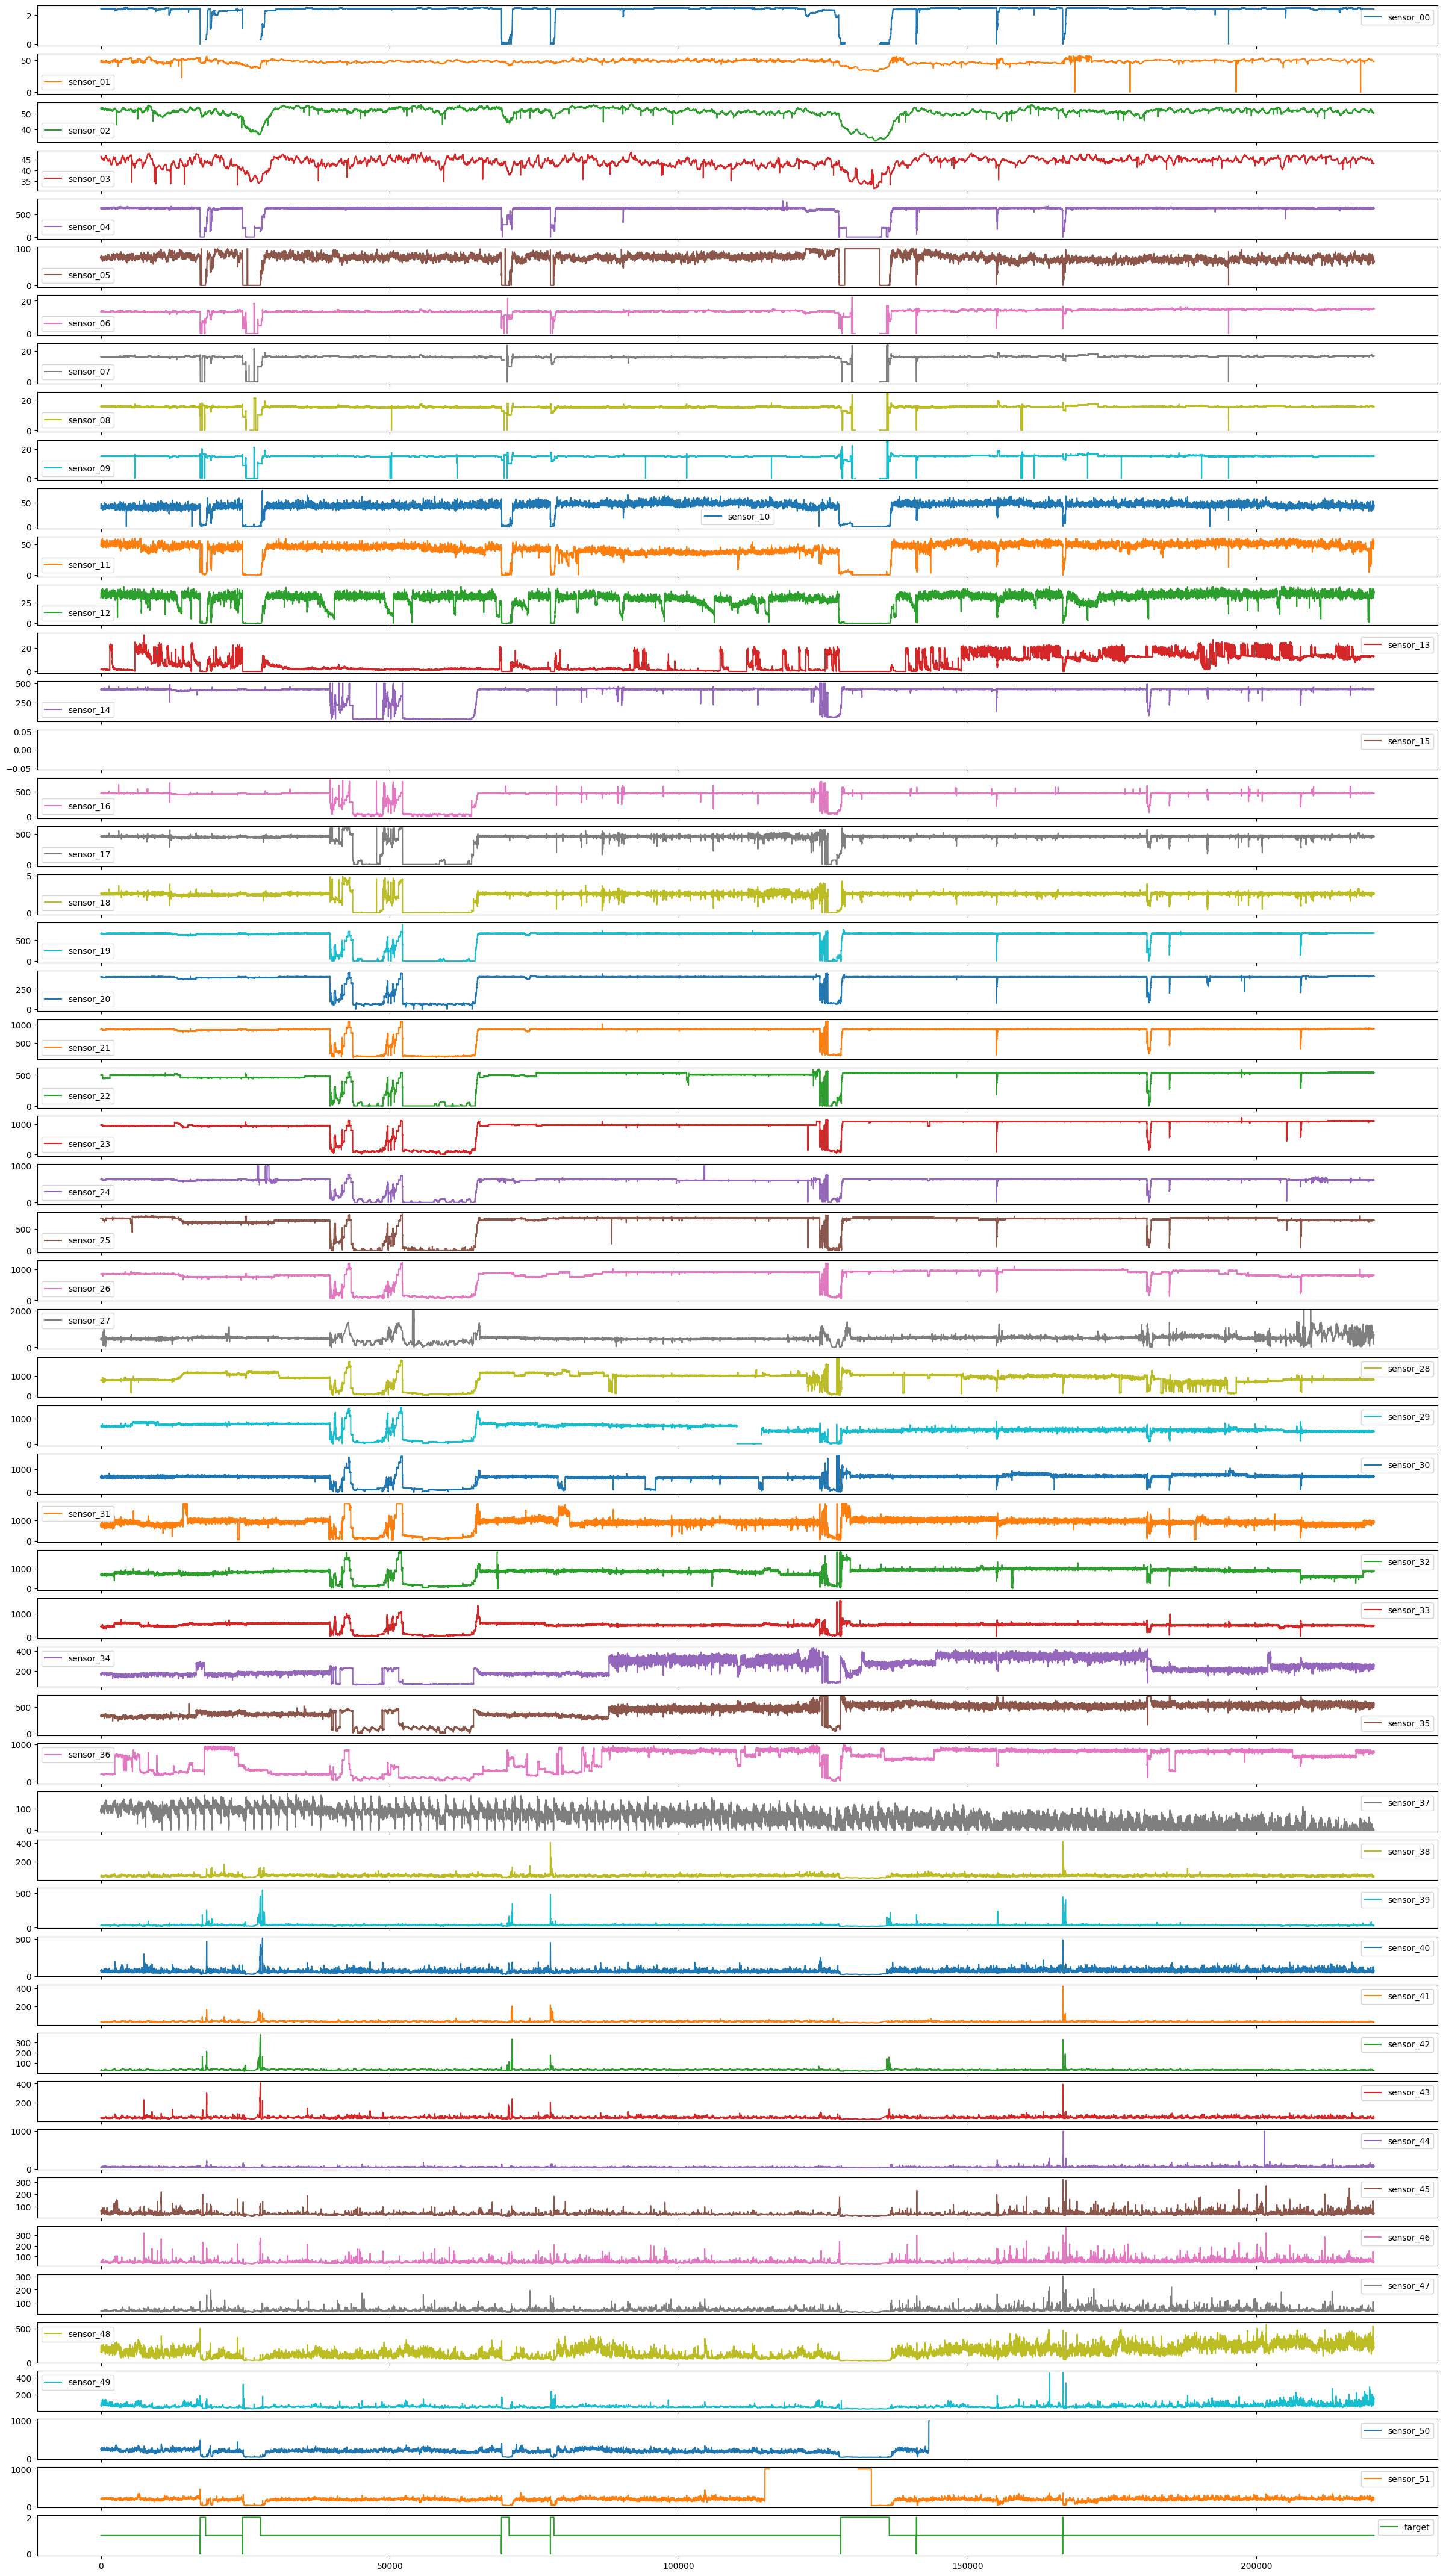

In [ ]:
if __name__ == '__main__':
    head = df.head()
    tail = df.tail()
    info = df.describe()
    data = df.drop(['timestamp', 'machine_status'], axis=1)
    variance = pd.DataFrame({'var':(data[2:-1]).var()})
    info = pd.concat([info,variance.transpose()])
    description = info
    d_std=description.loc[['std']][sensorname]
    d_var=description.loc[['var']][sensorname]
    plot_Y(df,col='machine_status',saving=False,name='Class')
    plotter((df.isna().sum())[2:-1],'bar','Raw-NaN',saving=False)
    plotter(d_std.transpose(),'bar','std',saving=True)
    plotter(d_var.transpose(),'bar','var',saving=True)
    manipulate(df, detail=True)
    for i in sensorname:
         plotter(df[i],'line',str(i))
    encoded_y=preprocess(df['machine_status']);
    plot_Y(encoded_y,col='target', saving=True , name='Class')
    Values=pd.concat([df[sensorname],encoded_y],axis=1)
    plotter_m(df[sensorname],encoded_y, sensorname,saving=True)
    plotter_t(Values)

In [ ]:
def time(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, namen = list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        namen +=[('sensor%d(t-%d)' %(j+1, i)) for j in range (n_vars)]
        #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            namen +=[('sensor%d(t)' %(j+1)) for j in range (n_vars)]
        else:
            namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=namen
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def split(data_x,data_y):
    train_X=data_x[0:120000].values
    train_Y=data_y[0:120000].values

    val_X=data_x[140000::].values
    val_Y=data_y[140000::].values

    test_X=data_x[120000:140000].values
    test_Y=data_y[120000:140000].values

    train_X.astype('float32')
    val_X.astype('float32')
    test_X.astype('float32')

    return train_X,train_Y,val_X,val_Y,test_X,test_Y,

def reshape_LSTM(data):
    # reshape for input
    timesteps=1
    samples=int(np.floor(data.shape[0]/timesteps))

    data=data.reshape((samples,timesteps,data.shape[1]))
    return data

def ohe(train_Y,val_Y,test_Y):

    oneHot=OneHotEncoder()
    oneHot.fit(train_Y.reshape(-1,1))

    train_Y_Hot=oneHot.transform(train_Y.reshape(-1,1)).toarray()
    val_Y_Hot  =oneHot.transform(val_Y.reshape(-1,1)).toarray()
    test_Y_Hot =oneHot.transform(test_Y.reshape(-1,1)).toarray()

    return train_Y_Hot,val_Y_Hot,test_Y_Hot

def model_setup_seq(in_shape):


    model = Sequential()
    model.add(LSTM(32,activation='relu', input_shape=(in_shape[1],in_shape[2]),
                   return_sequences=True)  )#,
    model.add(LSTM(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def model_setup_Fapi(in_shape):
    inputs= keras.Input(shape=(in_shape[1],in_shape[2]))
    x=LSTM(42,activation='relu', input_shape=(in_shape[1],in_shape[2]),return_sequences=True)(inputs)
    x=LSTM(42,activation='relu')(x)
    out_signal=Dense(1, name='signal_out')(x)
    out_class=Dense(3,activation='softmax', name='class_out')(x)

    model=keras.Model(inputs=inputs, outputs=[out_signal,out_class])

    model.compile(loss={'signal_out':'mean_squared_error',
                        'class_out' :'categorical_crossentropy'},
                         optimizer='adam',
                         metrics={'class_out':'acc'})

    print(model.summary())
    return model

def plot_train(history,what='loss',saving=False,name='training'):
    fig=plt.figure()
    plt.plot(history[0])
    plt.plot(history[1])
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if what=='loss':
        plt.title('model loss')
        plt.ylabel('loss')
    elif what=='acc':
        plt.title('model Acc')
        plt.ylabel('Accuracy')
    if saving==True:
        fig.savefig( name +'_'+ what + '.png', format='png', dpi=300, transparent=True)


    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if saving==True:
        fig.savefig( name +'_ACC.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_signal(Y_test,Y_hat,saving=False,name='results_signal'):
    fig= plt.figure()
    plt.plot(Y_hat)
    plt.plot(Y_test)
    plt.legend(['target','target_predicted'])
    plt.ylabel('Condition')
    plt.title('Prediction on test data')
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_class(Y_hat,Y_test,saving=False,name='results_class'):
    from matplotlib import cm
    x=np.linspace(1,len(Y_hat),len(Y_hat))

    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1=plt.plot(x,Y_test)
    ax1=plt.scatter(x,Y_hat,c=cm.hot(np.abs(Y_hat)), edgecolor='none')
    plt.legend(['target','target_predicted'])
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

#Model Training and Results

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 45)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 1, 42)                14784     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 42)                   14280     ['lstm[0][0]']                
                                                                                                  
 signal_out (Dense)          (None, 1)                    43        ['lstm_1[0][0]']              
                                                                                              

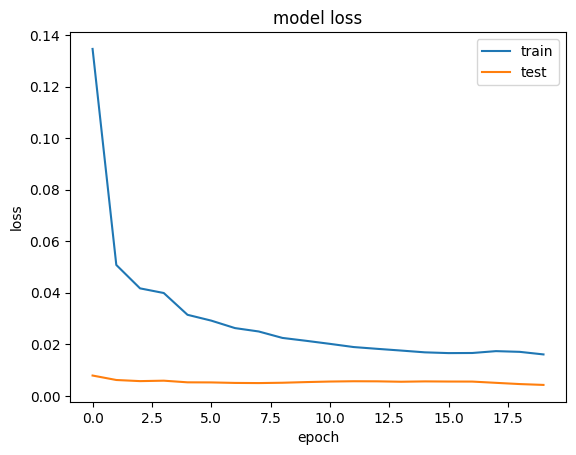

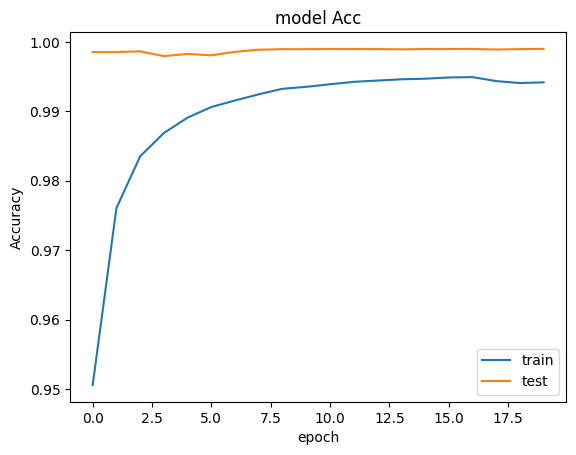

625/625 [==============================] - 2s 2ms/step


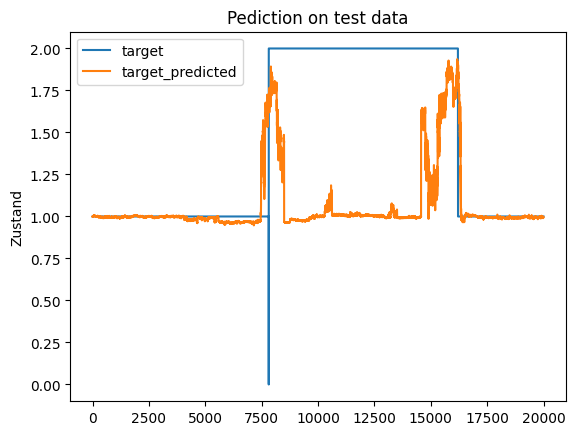

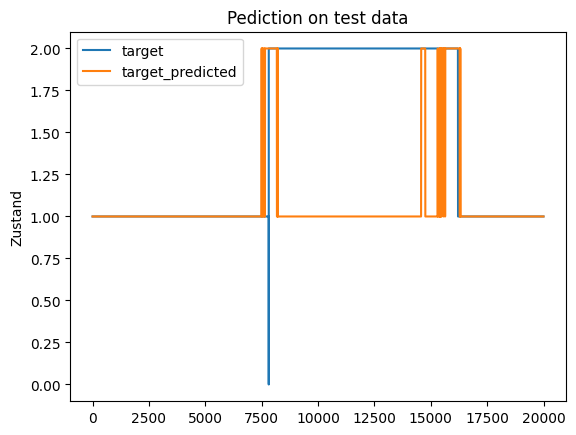

In [ ]:
if __name__ == '__main__':
    Values=manipulate(Values, detail=False); sensorname=Values.keys()[:-1]

    Future=1

    data_win=time(Values, n_in=Future, n_out=1)
    to_remove_list =['sensor'+str(n)+'(t)' for n in range(1,len(Values.columns)+1)]
    data_y=data_win.iloc[:,-1]
    data_x=data_win.drop(to_remove_list, axis=1)
    data_x.drop(data_x.columns[len(data_x.columns)-1], axis=1, inplace=True)# remove target(t-n)

    train_X,train_Y,val_X,val_Y,test_X,test_Y=split(data_x,data_y)
    train_Y_Hot,val_Y_Hot,test_Y_Hot=ohe(train_Y,val_Y,test_Y)

    scaler=MinMaxScaler().fit(train_X)
    train_X=scaler.transform(train_X)

    scaler=MinMaxScaler().fit(val_X)
    val_X=scaler.transform(val_X)

    scaler=MinMaxScaler().fit(test_X)
    test_X=scaler.transform(test_X)
    train_X=reshape_LSTM(train_X)
    val_X=reshape_LSTM(val_X)
    test_X=reshape_LSTM(test_X)

    Train=True
    inputshape_X=(train_X.shape)


    if Train==True:

        model=model_setup_Fapi(inputshape_X)
        history = model.fit(train_X, [train_Y, train_Y_Hot], epochs=20, batch_size=32, validation_data=(val_X, [val_Y,val_Y_Hot]), shuffle=False)
        plot_train([history.history['class_out_loss'],history.history['val_class_out_loss']],
                      what='loss',
                      saving=True,
                      name=('training_'+ str(Future)))
        plot_train([history.history['class_out_acc'],history.history['val_class_out_acc']],
                      what='acc',
                      saving=True,
                      name=('training_'+ str(Future)))
        model.save('./model/Pump_LSTM_Fapi_4_'+ str(Future))

    else:
        model=keras.models.load_model('./model/Pump_LSTM_Fapi')

    [yhat,yclass] = model.predict(test_X)
    Yclass=[np.argmax(yclass[i],0) for i in range(len(yclass))]

    plot_signal(yhat,test_Y,saving=True, name='Prediction_Signal_fapi3_42_'+ str(Future))
    plot_signal(Yclass,test_Y,saving=True, name='Prediction_class_fapi3_42_'+ str(Future))
